In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import *
import scipy.cluster.hierarchy as hi

## Dataset importation

In [3]:
df = pd.read_excel('depenses-etat2.xls')
df.head(10)

,années,pouvoir public,agriculture,commerce et industrie,transport,logement,éducation et culture,action sociale,anciens combattants,défense,dette,divers
0,1872,18.0,0.5,0.1,6.7,0.5,2.1,2.0,0.0,26.4,41.5,2.1
1,1880,14.1,0.8,0.1,15.3,1.9,3.7,0.5,0.0,29.8,31.3,2.5
2,1890,13.6,0.7,0.7,6.8,0.6,7.1,0.7,0.0,33.8,34.4,1.7
3,1900,14.3,1.7,1.7,6.9,1.2,7.4,0.8,0.0,37.7,26.2,2.2
4,1903,10.3,1.5,0.4,9.3,0.6,8.5,0.9,0.0,38.4,27.2,3.0
5,1906,13.4,1.4,0.5,8.1,0.7,8.6,1.8,0.0,38.5,25.3,1.9
6,1909,13.5,1.1,0.5,9.0,0.6,9.0,3.4,0.0,36.8,23.5,2.6
7,1912,12.9,1.4,0.3,9.4,0.6,9.3,4.3,0.0,41.1,19.4,1.3
8,1920,12.3,0.3,0.1,11.9,2.4,3.7,1.7,1.9,42.4,23.1,0.2
9,1923,7.6,1.2,3.2,5.1,0.6,5.6,1.8,10.0,29.0,35.0,0.9


In [4]:
data = df.values
ministeres = np.asarray(df.columns)
annees = np.asarray(df.index)

## Data scaling using the _preprocessing.scale_ function of the Scikit-Learn library

In [5]:
data_scaled = preprocessing.scale(data)

## Normalise function to scale data

In [6]:
def normalise(M):
    n,p=M.shape
    N=np.zeros((n,p))
    for i in range(p):
        N[:,i]=(M[:,i]-np.mean(M[:,i]))/np.std(M[:,i])
    return N

## Correlation function to create the correlation matrix

In [7]:
def correlation(M):
    Z= normalise(M)
    n=Z.shape[0]
    return 1/n*np.dot(Z.T,Z)

## ACP function to retrieve the eigenvalues, the eigenvectors and the C matrix

In [8]:
def acp(M):
    n,p=M.shape
    R= correlation(M)
    valtemp, vectemp = linalg.eigh(R) 
    val = np.sort(valtemp)[::-1]
    index = np.argsort(valtemp)[::-1] 
    P=np.zeros((p,p))
    for i in range(p):
        P[:,i]=vectemp[:,index[i]]
    C=np.dot(normalise(M),P)
    return val, P, C

## cercle_corr function to create the circle correlation between a column and the other columns of the dataset

In [9]:
def cercle_corr(data,labels):
    val,P,comp=acp(data)
    plt.figure(figsize=(10,10))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    c1 = np.sqrt(val[0])*P[:,0]
    c2 = np.sqrt(val[1])*P[:,1]
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for i in range(c1.shape[0]):
        plt.plot([0,c1[i]],[0,c2[i]])
        plt.annotate(labels[i],(c1[i],c2[i]))
    plt.grid(True)

## _cercle\_corr_ function used with the _ministeres_ column

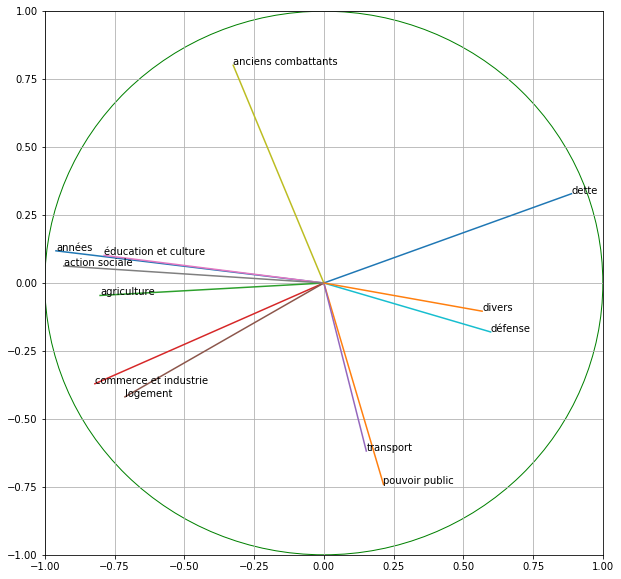

In [10]:
cercle_corr(data,ministeres)

## _cercle\_corr_ function used with the _annees_ column

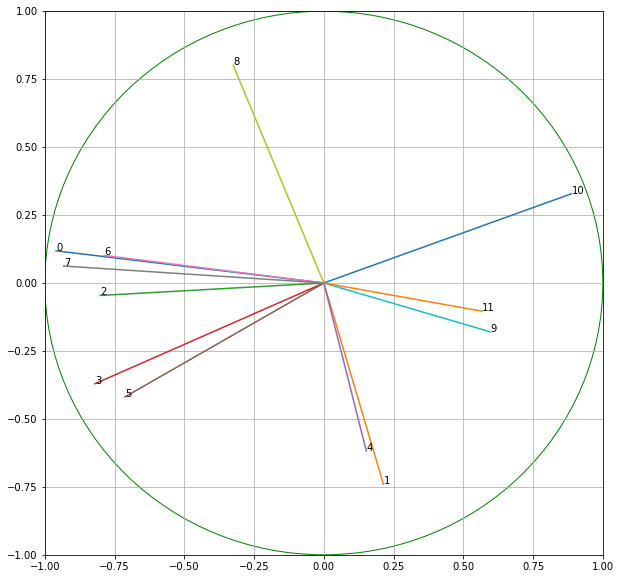

In [11]:
cercle_corr(data,annees)

## _scipy.cluster.hierarchy ward_ classification function use case

In [12]:
hi.ward(data)

array([[  5.        ,   6.        ,   4.38862165,   2.        ],
       [ 21.        ,  22.        ,   5.38702144,   2.        ],
       [ 12.        ,  13.        ,   5.91016074,   2.        ],
       [  3.        ,   4.        ,   6.01664358,   2.        ],
       [ 18.        ,  19.        ,   6.166036  ,   2.        ],
       [ 23.        ,  25.        ,   9.0689948 ,   3.        ],
       [  7.        ,  24.        ,   9.11299439,   3.        ],
       [ 20.        ,  28.        ,   9.2487837 ,   3.        ],
       [ 15.        ,  17.        ,  10.06777036,   2.        ],
       [ 11.        ,  26.        ,  11.23461912,   3.        ],
       [  9.        ,  10.        ,  12.54153101,   2.        ],
       [ 27.        ,  30.        ,  13.97760113,   5.        ],
       [  1.        ,   2.        ,  14.57429244,   2.        ],
       [ 14.        ,  33.        ,  19.31510635,   4.        ],
       [ 16.        ,  32.        ,  20.0059991 ,   3.        ],
       [  0.        ,  36

## _scipy.cluster.hierarchy dendogram_ hierarchical clustering function use case

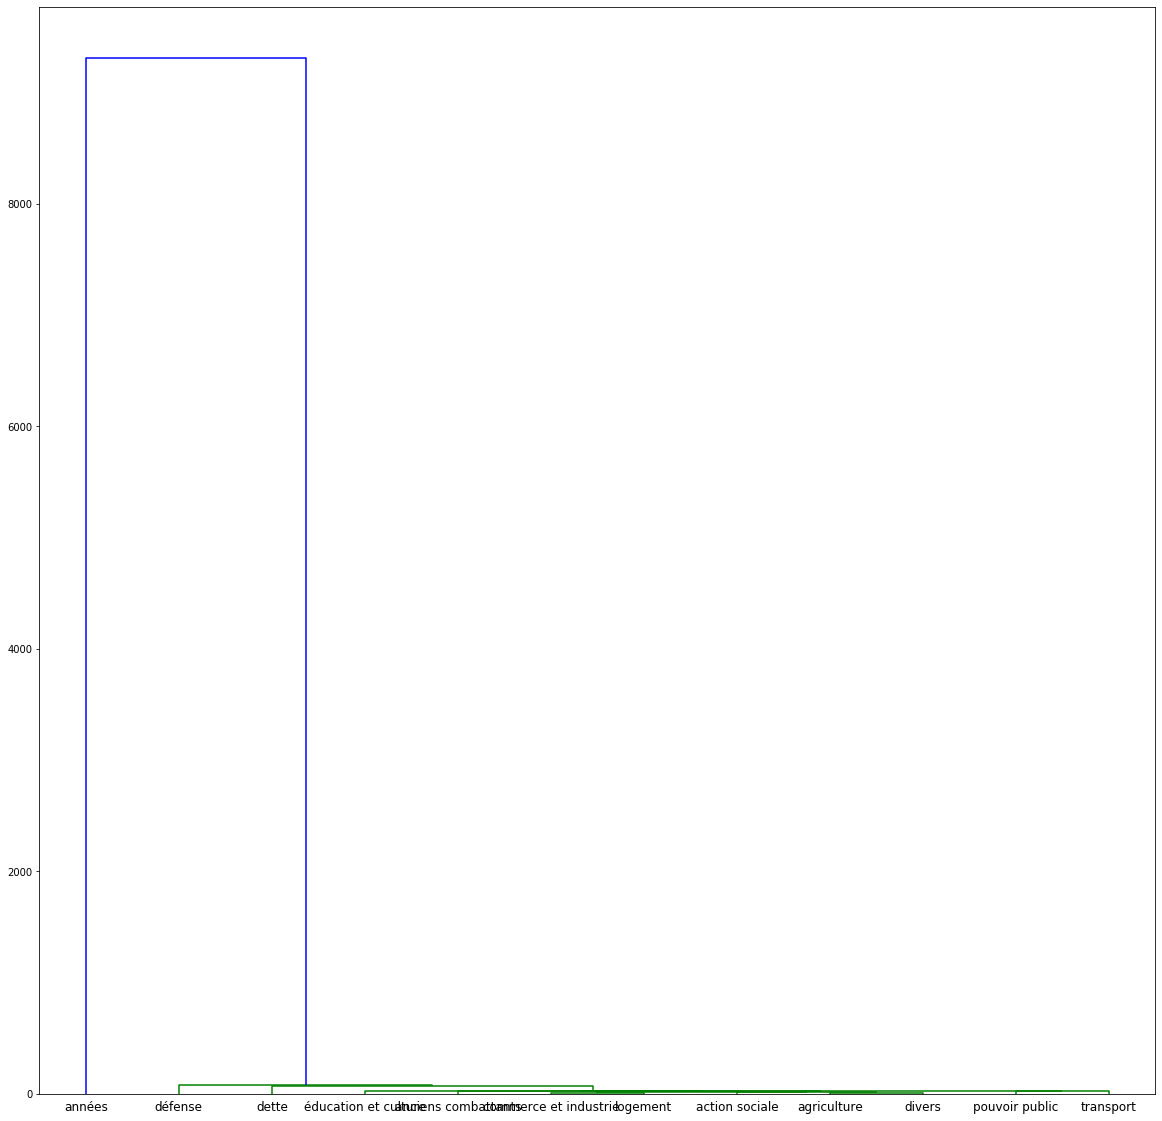

In [13]:
plt.figure(figsize=(20, 20))
hi.dendrogram(hi.linkage(data.T),labels=ministeres)
plt.show()

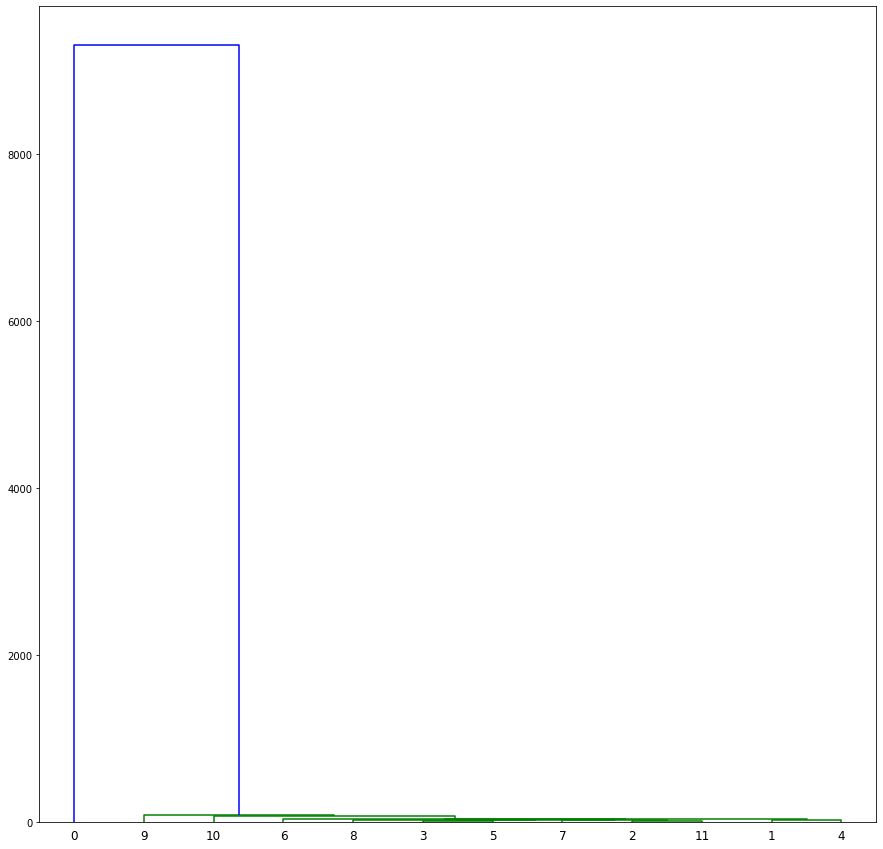

In [14]:
plt.figure(figsize=(15, 15))
hi.dendrogram(hi.linkage(data.T))
plt.show()

## ACP function used with the scaled data

In [15]:
val,P,C = acp(data_scaled)

## _sklearn_ decomposition PCA function

In [16]:
nb_components = 12
pca = decomposition.PCA(n_components=nb_components)
pca.fit(np.diag(val))

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
print(pca.explained_variance_ratio_)

[8.16259763e-01 1.00945338e-01 4.01243523e-02 2.29136657e-02
 1.15798897e-02 6.63623066e-03 1.08351687e-03 3.38379371e-04
 7.91111181e-05 3.07172718e-05 9.03545327e-06 1.25116464e-42]


## KMeans clustering of the scaled data

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=2).fit(data_scaled)
palette=['green','orange','brown','dodgerblue','red','crimson','gold','indigo','black','peru','slategreen','orangered']
centroids = kmeans.cluster_centers_

## Scatter of the cluster centers

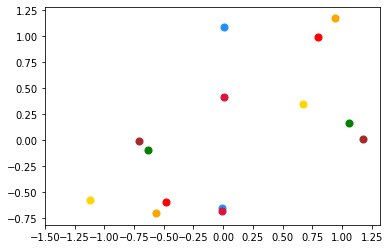

In [20]:
plt.scatter(centroids[:, 0], centroids[:, 1], c=palette[0], s=50)
plt.scatter(centroids[:, 2], centroids[:, 3], c=palette[1], s=50)
plt.scatter(centroids[:, 3], centroids[:, 4], c=palette[2], s=50)
plt.scatter(centroids[:, 4], centroids[:, 5], c=palette[3], s=50)
plt.scatter(centroids[:, 6], centroids[:, 7], c=palette[4], s=50)
plt.scatter(centroids[:, 8], centroids[:, 9], c=palette[5], s=50)
plt.scatter(centroids[:, 10], centroids[:, 11], c=palette[6], s=50)
plt.xticks(np.arange(-1.5, 1.3, step=.25))
plt.show()

## Scatter of the data_scaled dataset

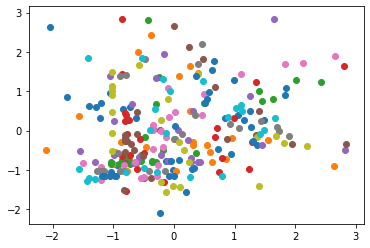

In [21]:
for i in range(0,11):
    plt.scatter(data_scaled[:, i], data_scaled[:, i+1])

## Importation of the _Seaborn_ library for stats analysis

In [22]:
import seaborn as sns

## Heatmap of the dataset

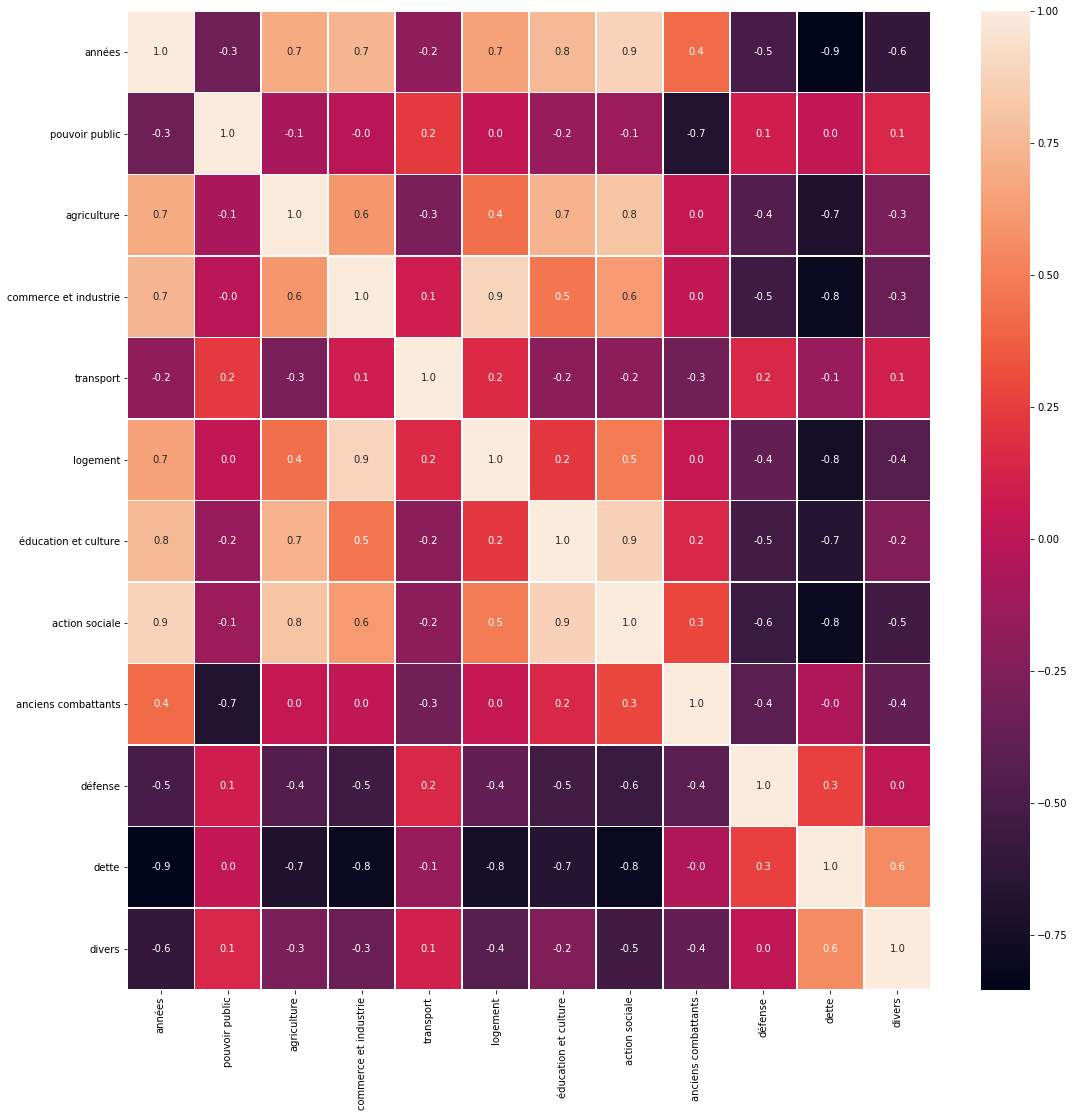

In [23]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

We can observe that most of the columns are not correlated between them or negativly correlated.

In [24]:
df.columns

Index(['années', 'pouvoir public', 'agriculture', 'commerce et industrie',
       'transport', 'logement', 'éducation et culture', 'action sociale',
       'anciens combattants', 'défense', 'dette', 'divers'],
      dtype='object')

## Pairplot of the first six columns

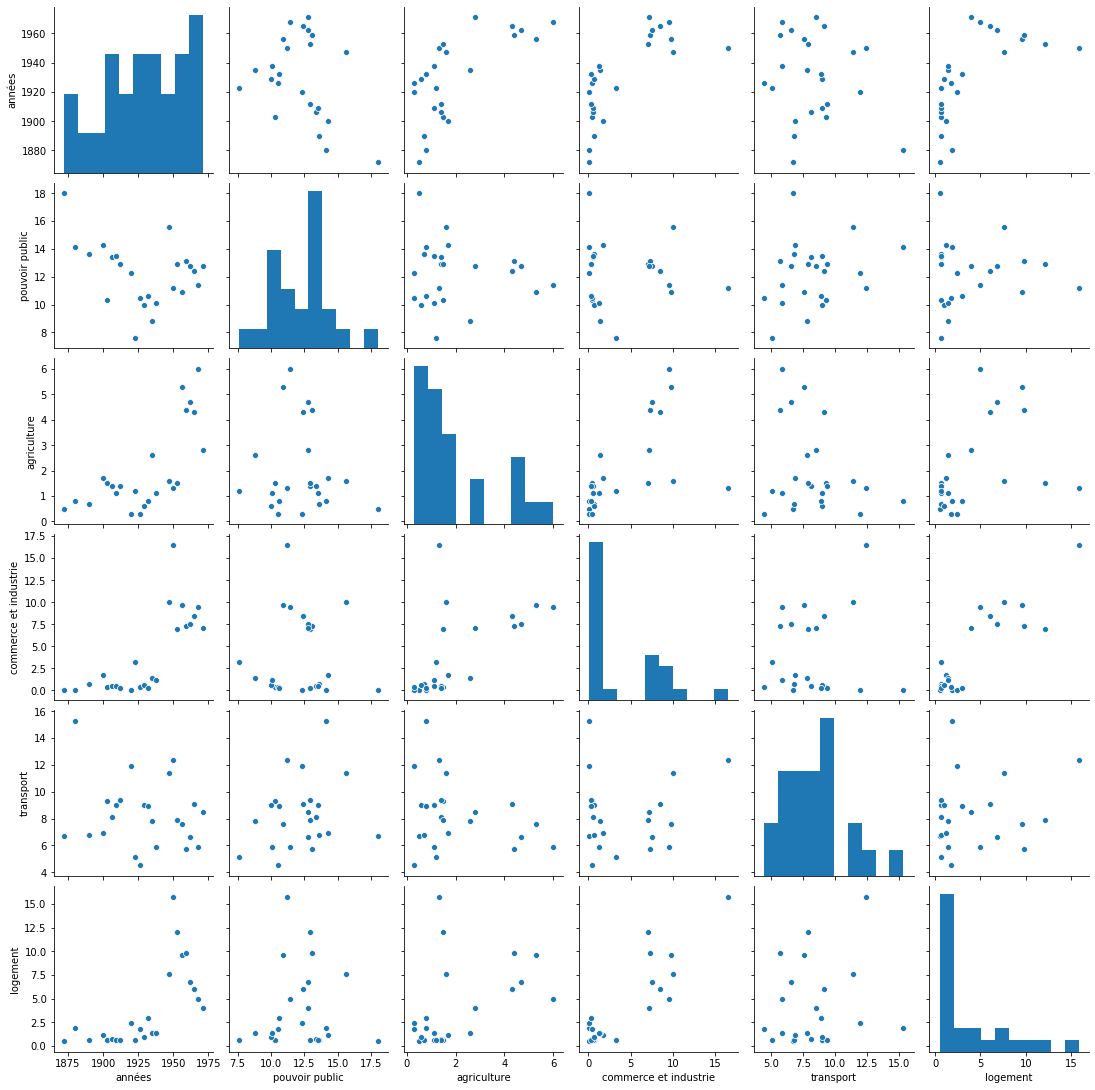

In [25]:
first_six_columns = df.columns[0:6]
sns.pairplot(df[first_six_columns],height=2.5)
plt.show()

## Pairplots of the last six columns

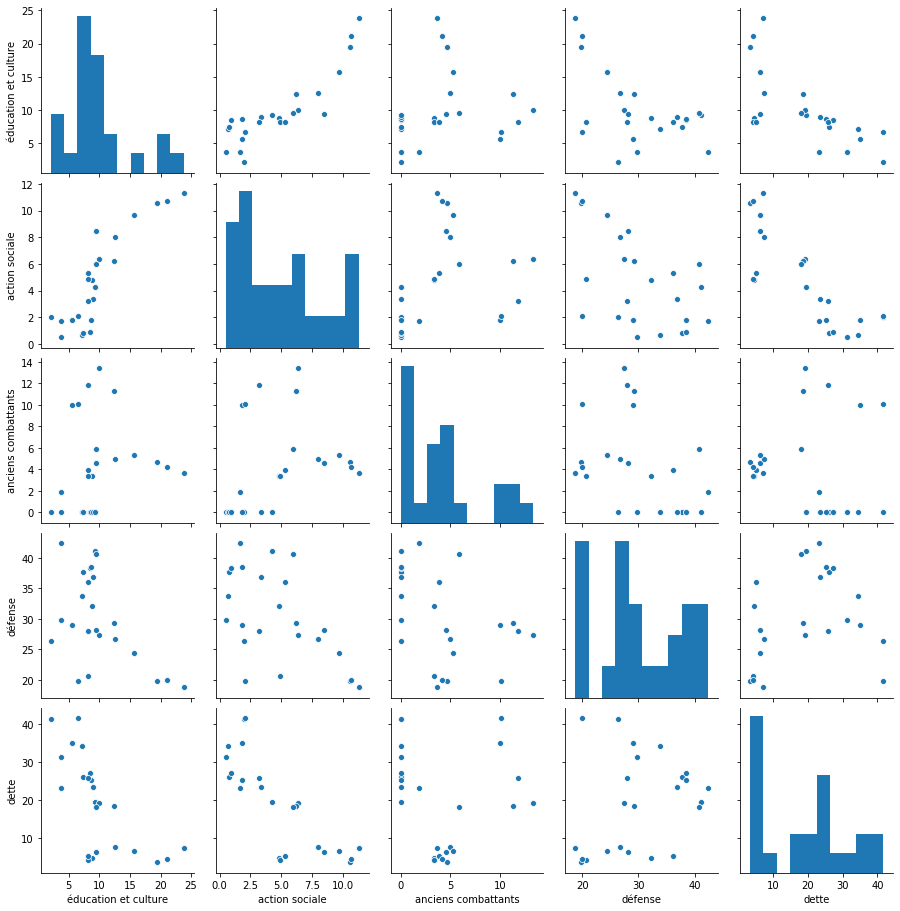

In [26]:
last_six_columns = df.columns[6:-1]
sns.pairplot(df[last_six_columns],height=2.5)
plt.show()

## Import of the _scipy_ library

In [27]:
from scipy.stats import norm
from scipy import stats

## Distribution plot and probability plot of the _dette_ column

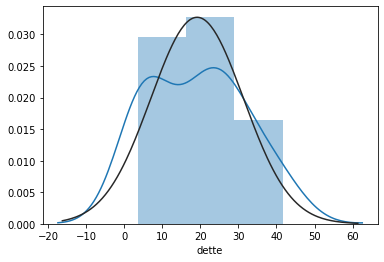

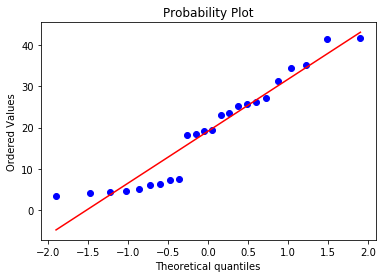

In [28]:
sns.distplot(df['dette'],fit=norm)
fig = plt.figure()
res = stats.probplot(df['dette'],plot=plt)

We can observe with the distribution plot that the _dette_ columns is almost normally distributed. We can also see with the probability plot that most of the values are close to best-fit line.

## Creation of a new DataFrame with the log values of the dataframe

In [29]:
df_log = pd.DataFrame(np.log(df))

## Distribution plot and probability plot of the _dette_ column after using the log function

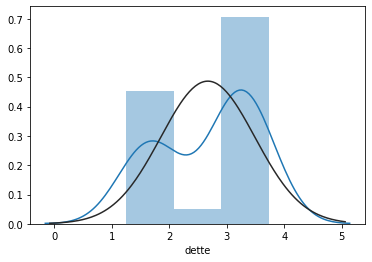

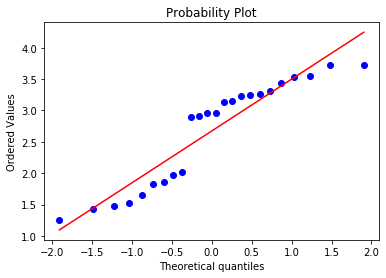

In [30]:
sns.distplot(df_log['dette'],fit=norm)
fig = plt.figure()
res = stats.probplot(df_log['dette'],plot=plt)

In [31]:
df_log.head()

,années,pouvoir public,agriculture,commerce et industrie,transport,logement,éducation et culture,action sociale,anciens combattants,défense,dette,divers
0,7.534763,2.890372,-0.693147,-2.302585,1.902108,-0.693147,0.741937,0.693147,-inf,3.273364,3.725693,0.741937
1,7.539027,2.646175,-0.223144,-2.302585,2.727853,0.641854,1.308333,-0.693147,-inf,3.394508,3.443618,0.916291
2,7.544332,2.610070,-0.356675,-0.356675,1.916923,-0.510826,1.960095,-0.356675,-inf,3.520461,3.538057,0.530628
3,7.549609,2.660260,0.530628,0.530628,1.931521,0.182322,2.001480,-0.223144,-inf,3.629660,3.265759,0.788457
4,7.551187,2.332144,0.405465,-0.916291,2.230014,-0.510826,2.140066,-0.105361,-inf,3.648057,3.303217,1.098612


## Function _distplot_ to reduce code redundancy

In [32]:
def distp(data,column):
    sns.distplot(data[column],fit=norm)
    fig = plt.figure()
    res = stats.probplot(data[column],plot=plt)

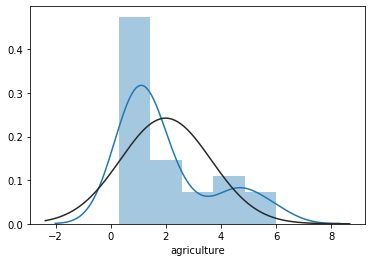

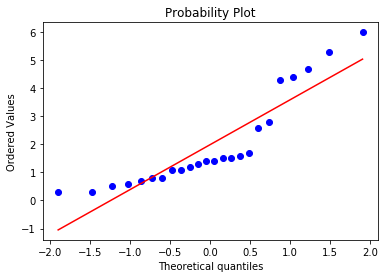

In [33]:
distp(df,'agriculture')

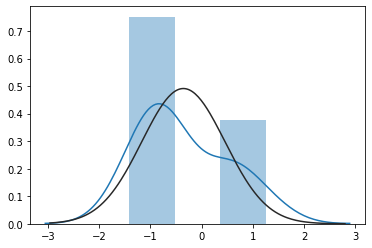

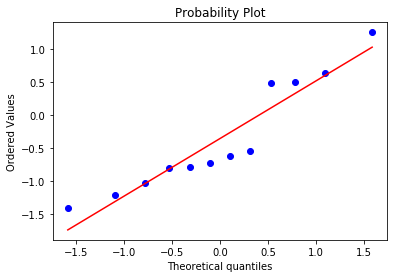

In [34]:
distp(data_scaled,df.columns.get_loc('agriculture'))

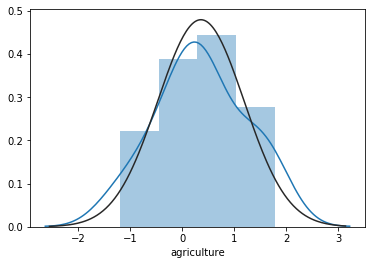

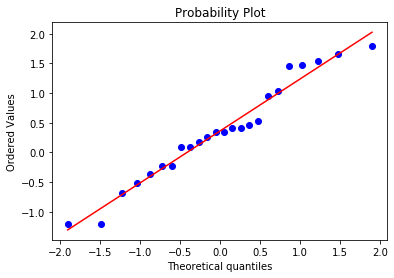

In [35]:
distp(df_log,'agriculture')

We can see that the distribution of the _agriculture_ column of the log values DataFrame is the closest to bell curve and the plot values are close to the best-fit line 

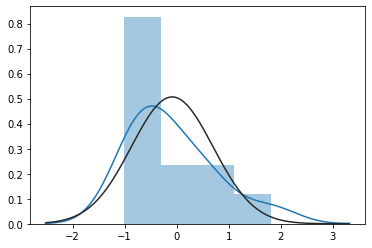

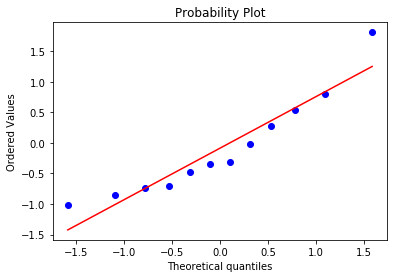

In [36]:
distp(data_scaled,df.columns.get_loc('divers'))

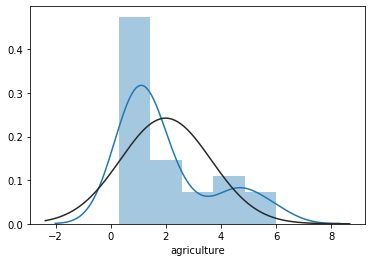

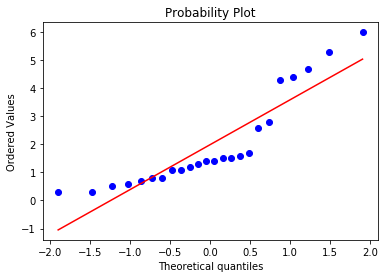

In [37]:
distp(df,'agriculture')

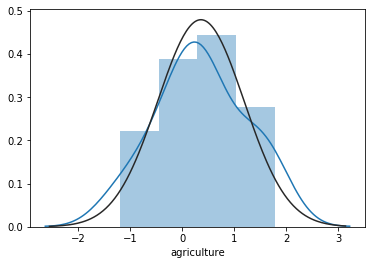

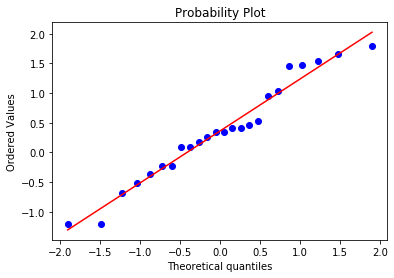

In [38]:
distp(df_log,'agriculture')